In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


### **I. Tính toán Linear Regression không dùng đến thư viện**

#### **a. Cơ sở lý thuyết để tính toán**

Mục tiêu của Hồi quy Tuyến tính là tìm ra một mối quan hệ tuyến tính giữa các biến đặc trưng (biến độc lập $X$) và biến mục tiêu (biến phụ thuộc $y$). Phương pháp Bình phương Tối thiểu (Least Squares) là kỹ thuật tối ưu hóa cổ điển được sử dụng để tìm ra các hệ số hồi quy sao cho tổng bình phương của các sai số (khoảng cách giữa giá trị thực $y$ và giá trị dự đoán $\hat{y}$) là nhỏ nhất. Ta cần tìm ra vector hệ số hồi quy $\mathbf{\beta}$ sao cho $\mathbf{y} \approx \mathbf{X}\mathbf{\beta}$ bằng cách tối thiểu hóa tổng bình phương sai số.

Mô hình Hồi quy Tuyến tính Đa biến (Multiple Linear Regression) cho một điểm dữ liệu thứ $i$:$$y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip} + \epsilon_i$$
- $y_i$: Là Biến Mục tiêu (hoặc Biến Phụ thuộc) cần được dự đoán.
- $\beta_0$: Là Hệ số Chặn (Intercept), là giá trị dự đoán của $y_i$ khi tất cả các biến đặc trưng ($x$) đều bằng 0.
- $\beta_1, \dots, \beta_p$: Là các Hệ số Hồi quy (Coefficients), đo lường sự thay đổi của $y_i$ khi thay đổi một đơn vị của biến đặc trưng tương ứng ($x_{i1}, \dots, x_{ip}$), giữ các biến khác cố định.
- $x_{i1}, \dots, x_{ip}$: Là các Biến Đặc trưng (hoặc Biến Độc lập) của điểm dữ liệu thứ $i$.
- $\epsilon_i$: Là Sai số (Error Term) hay Phần dư, là phần mà mô hình không giải thích đượ


##### **1. Thiết lập Mô hình và Ký hiệu Ma trận**
Mô hình hồi quy tuyến tính đa biến được biểu diễn dưới dạng ma trận như sau:$$\mathbf{y} = \mathbf{X}\mathbf{\beta} + \mathbf{\epsilon}$$Trong đó:
- $\mathbf{y}$: Vector mục tiêu ($n \times 1$).
- $\mathbf{X}$: Ma trận đặc trưng ($n \times (p+1)$), với cột đầu tiên là vector $\mathbf{1}$ (dành cho hệ số chặn $\beta_0$).
- $\mathbf{\beta}$: Vector hệ số hồi quy ($(p+1) \times 1$).
- $\mathbf{\epsilon}$: Vector phần dư/sai số ($n \times 1$).
##### **2. Hàm Mất mát Bình phương Tối thiểu (Least Squares Loss)**
Hàm mất mát (Loss Function) $L(\mathbf{\beta})$ là Tổng Bình phương Sai số (Sum of Squared Errors - SSE) giữa giá trị thực $\mathbf{y}$ và giá trị dự đoán $\mathbf{\hat{y}} = \mathbf{X}\mathbf{\beta}$:$$L(\mathbf{\beta}) = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$Biểu diễn dưới dạng ma trận:$$L(\mathbf{\beta}) = (\mathbf{y} - \mathbf{X}\mathbf{\beta})^T (\mathbf{y} - \mathbf{X}\mathbf{\beta})$$
##### **3. Công thức Nghiệm Đóng (Normal Equation)**
Để tối thiểu hóa $L(\mathbf{\beta})$, ta lấy đạo hàm riêng theo $\mathbf{\beta}$ và đặt bằng $\mathbf{0}$:$$\frac{\partial L}{\partial \mathbf{\beta}} = -2\mathbf{X}^T (\mathbf{y} - \mathbf{X}\mathbf{\beta}) = \mathbf{0}$$Giải phương trình này, ta thu được Phương trình Chuẩn (Normal Equation):$$\mathbf{X}^T \mathbf{X}\mathbf{\beta} = \mathbf{X}^T \mathbf{y}$$Và nghiệm đóng cho vector hệ số tối ưu $\mathbf{\hat{\beta}}$ là:$$\mathbf{\hat{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

Sau khi tính toán được vector hệ số hồi quy tối ưu $\mathbf{\hat{\beta}}$ bằng công thức Normal Equation $\mathbf{\hat{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$, bước tiếp theo là đánh giá hiệu suất của mô hình. Bạn cần tính Hệ số Xác định ($R^2$) để đánh giá mức độ phù hợp của mô hình với dữ liệu, và sử dụng phương pháp Kiểm định Chéo (Cross-Validation - CV) để đánh giá khả năng tổng quát hóa của mô hình.
##### **Tính Hệ số Xác định ($R^2$)**
Hệ số Xác định ($R^2$ - Coefficient of Determination) là chỉ số quan trọng đo lường tỷ lệ phương sai của biến mục tiêu ($y$) được giải thích bởi mô hình. $R^2$ luôn nằm trong khoảng $[0, 1]$. Giá trị càng gần 1, mô hình càng phù hợp với dữ liệu.
- Bước 1: Tính Giá trị Dự đoán ($\mathbf{\hat{y}}$)
Sử dụng các hệ số $\mathbf{\hat{\beta}}$ đã tìm được để dự đoán giá trị $y$ cho tập dữ liệu:$$\mathbf{\hat{y}} = \mathbf{X}\mathbf{\hat{\beta}}$$
- Bước 2: Tính Giá trị Trung bình của $y$
 ($\bar{y}$)$$\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i$$
- Bước 3: Tính các Tổng Bình phương
Để tính $R^2$, ta cần hai thành phần: Tổng Bình phương Phần dư ($SS_{res}$ - Residual Sum of Squares): Đo lường tổng lỗi (phần mà mô hình không giải thích được).$$SS_{res} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$Tổng Bình phương Toàn phần ($SS_{tot}$ - Total Sum of Squares): Đo lường tổng phương sai của $y$ (lỗi nếu chỉ dùng giá trị trung bình $\bar{y}$ để dự đoán).$$SS_{tot} = \sum_{i=1}^{n} (y_i - \bar{y})^2$$
- Bước 4: Tính $R^2$
$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

#### **b. Phần code**

In [76]:
df = pd.read_excel("/Users/thuytrangneee/Downloads/data0979_enriched.xlsx")
y = df['Total_Order_Demand']
X = df.drop(columns=['Total_Order_Demand'])
X = X.select_dtypes(exclude=['datetime', 'datetimetz'])
#Mã hoá các biến phân loại
X = pd.get_dummies(X, drop_first=True)
X_np = np.hstack((np.ones((X.shape[0], 1)), X.values.astype(float)))
y_np = y.values.reshape(-1, 1)
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(
    X_np, y_np, test_size=0.2, random_state=1
)
# 6. In 12 dòng đầu ma trận X và vector y (train)
print("12 dòng đầu X_train:")
print(X_train_np[:12])
print("\n12 dòng đầu y_train:")
print(y_train_np[:12])



12 dòng đầu X_train:
[[1. 4. 0. 0. 1. 1. 0. 0.]
 [1. 2. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 2. 0. 0. 0. 0. 0. 1.]
 [1. 1. 0. 0. 0. 0. 1. 0.]
 [1. 2. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0.]
 [1. 2. 0. 0. 0. 1. 0. 0.]
 [1. 2. 0. 0. 0. 0. 1. 0.]]

12 dòng đầu y_train:
[[19700]
 [ 1400]
 [15000]
 [    0]
 [    0]
 [  300]
 [  100]
 [  800]
 [    0]
 [    0]
 [  400]
 [ 4100]]


In [77]:
X_train_np = X_train_np.astype(float)
y_train_np = y_train_np.astype(float)
#Tính beta từ normal equation trên tập train
# Normal Equation: beta_hat = (X^T X)^(-1) X^T y
XtX_train = X_train_np.T @ X_train_np
Xty_train = X_train_np.T @ y_train_np
beta_hat = np.linalg.inv(XtX_train) @ Xty_train
print("5 hệ số đầu tiên của beta_hat:")
print(beta_hat[:5])

5 hệ số đầu tiên của beta_hat:
[[   18.13549552]
 [  683.43009055]
 [  128.41251871]
 [-1047.56824454]
 [11154.56001324]]


In [78]:
y_test_hat = X_test_np @ beta_hat
print(y_test_hat[:13])

[[   18.13549552]
 [   18.13549552]
 [   66.68501818]
 [ 2030.16270768]
 [   66.68501818]
 [  -20.12756398]
 [   65.70994348]
 [   18.13549552]
 [   66.68501818]
 [13954.96539364]
 [ 2068.42576718]
 [ 1433.54519929]
 [   18.13549552]]


In [90]:
def mse_loss_verbose(X, y, beta):
    """
    Tính hàm mất mát và in ra từng bước (ma trận) để theo dõi.
    """
    # 1. Tính dự đoán y_hat
    y_hat = X @ beta
    print("Ma trận dự đoán y_hat (5 dòng đầu):")
    print(y_hat[:5])

    # 2. Tính phần dư ε = y - y_hat
    residuals = y - y_hat
    print("\nMa trận phần dư ε (5 dòng đầu):")
    print(residuals[:5])

    # 3. SSE = ε^T ε
    SSE = (residuals.T @ residuals).item()
    print("\nMa trận ε^T ε (SSE):")
    print(SSE)

    # 4. MSE
    MSE = SSE / X.shape[0]
    print("\nGiá trị MSE:")
    print(MSE)

    return SSE, MSE

# Ví dụ sử dụng
SSE_test, MSE_test = mse_loss_verbose(X_test_np, y_test_np, beta_hat)
print("\nKết quả cuối cùng:")
print("SSE =", SSE)
print("MSE =", MSE)


Ma trận dự đoán y_hat (5 dòng đầu):
[[  18.13549552]
 [  18.13549552]
 [  66.68501818]
 [2030.16270768]
 [  66.68501818]]

Ma trận phần dư ε (5 dòng đầu):
[[  -18.13549552]
 [  -18.13549552]
 [  -66.68501818]
 [-1130.16270768]
 [  -66.68501818]]

Ma trận ε^T ε (SSE):
613521750.3678619

Giá trị MSE:
1676288.9354313165

Kết quả cuối cùng:
SSE = 3047552192.1187143
MSE = 1668063.5972187817


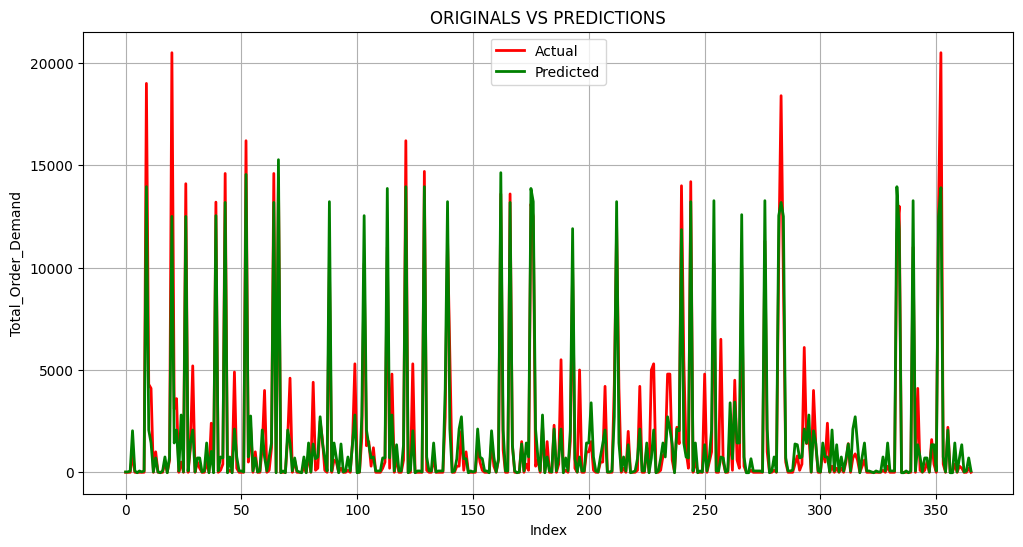

In [80]:
y_test_df = pd.DataFrame(y_test_np, columns=["Actual"]).reset_index()
y_hat_test_df = pd.DataFrame(y_test_hat, columns=["Predicted"])

ax = y_test_df["Actual"].plot(label="Actual", figsize=(12,6), linewidth=2, color="r")
ax = y_hat_test_df["Predicted"].plot(label="Predicted", figsize=(12,6), linewidth=2, color="g")
plt.legend(loc='best')
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("Index")
plt.ylabel("Total_Order_Demand")
plt.grid(True)
plt.show()

In [81]:
SS_res_test = np.sum((y_test_np - y_test_hat)**2)
SS_tot_test = np.sum((y_test_np - np.mean(y_test_np))**2)
R2_test = 1 - SS_res_test / SS_tot_test
print("R² trên test set:", R2_test)

R² trên test set: 0.8932260664254023


### **II. Sử dụng thư viện sklearn để tính toán, so sánh hiệu suất với một số mô hình khác**

In [82]:
df = pd.read_excel("/Users/thuytrangneee/Downloads/data0979_enriched.xlsx")
y = df['Total_Order_Demand']
X = df.drop(columns=['Total_Order_Demand'])
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)
x_train = x_train.select_dtypes(exclude=['datetime', 'datetimetz'])
x_test = x_test.select_dtypes(exclude=['datetime', 'datetimetz'])
x_train = pd.get_dummies(x_train, drop_first=True)
x_test = pd.get_dummies(x_test, drop_first=True)
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)



x train:  (1461, 7)
x test:  (366, 7)
y train:  (1461,)
y test:  (366,)


In [83]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [84]:
cv=5 # CV value
r_2 = [] # List for r 2 score
CV = [] # list for CV scores mean

#Hàm chính cho các model
def model(algorithm,x_train_,y_train_,x_test_,y_test_): 
    algorithm.fit(x_train_,y_train_)
    predicts=algorithm.predict(x_test_)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test_,prediction)
    cross_val=cross_val_score(algorithm,x_train_,y_train_,cv=cv)
    
    #Thêm kết quả vào list 
    r_2.append(R_2)
    CV.append(cross_val.mean())
    
    #In kết quả  
    print(algorithm,"\n") 
    print("r_2 score :",R_2,"\n")
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean())
    
    #Plot cho mô hình dự đoán và giá trị thực tế
    test_index=y_test_.reset_index()["Total_Order_Demand"]
    ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
    ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
    plt.legend(loc='best')
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()

LinearRegression() 

r_2 score : 0.8932260664254023 

CV scores: [0.90302977 0.85750299 0.8554198  0.76100961 0.83869431] 

CV scores mean: 0.8431312974106847


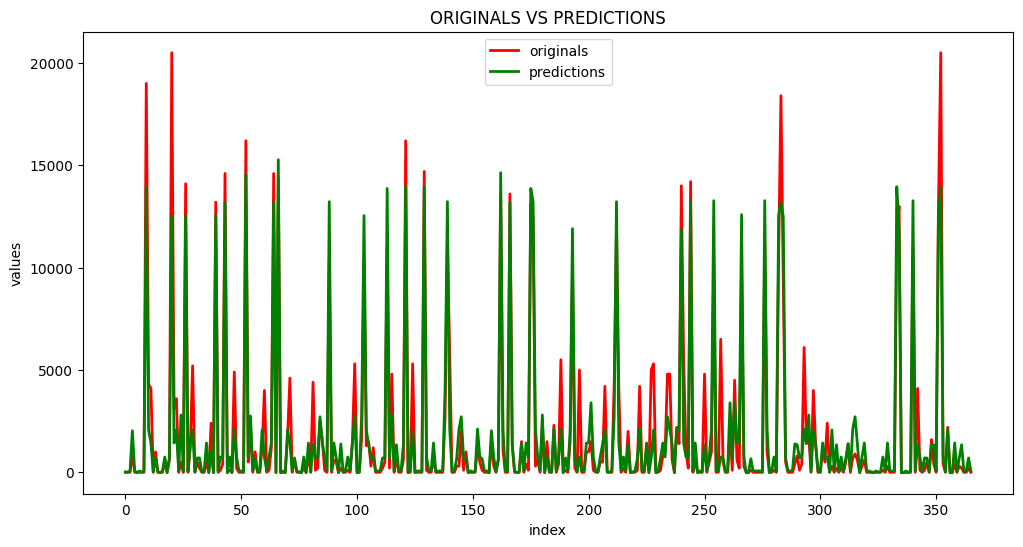

In [85]:
#linear regression 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,x_train,y_train,x_test,y_test)

DecisionTreeRegressor() 

r_2 score : 0.8835740562261845 

CV scores: [0.87200822 0.84728152 0.8338163  0.72757124 0.81224695] 

CV scores mean: 0.8185848465780188


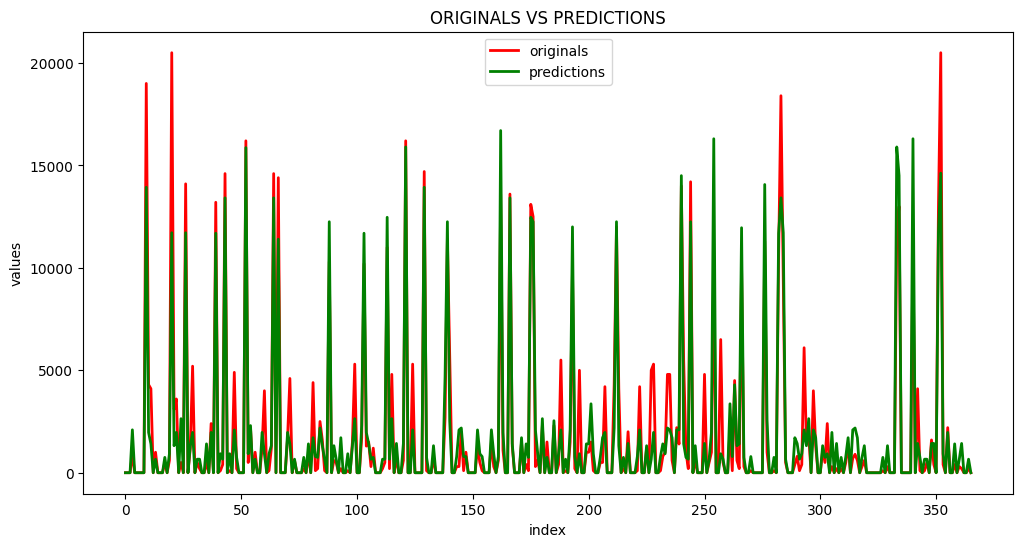

In [86]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
model(dtr,x_train,y_train,x_test,y_test)

RandomForestRegressor(random_state=42) 

r_2 score : 0.8848335499331546 

CV scores: [0.87894543 0.84439794 0.83404492 0.72992684 0.81438245] 

CV scores mean: 0.8203395188394964


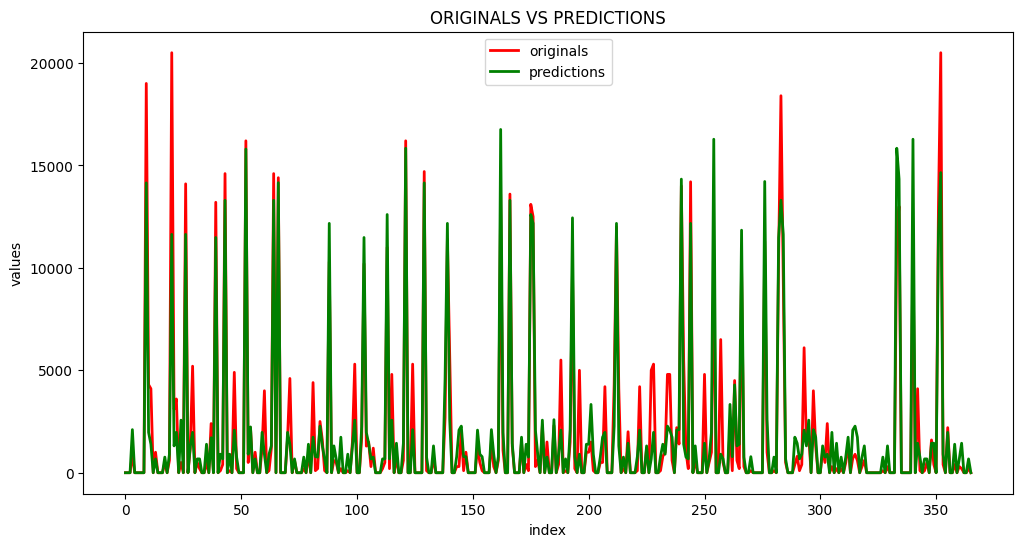

In [87]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
model(rf,x_train,y_train,x_test,y_test)

In [88]:
Model = ["LinearRegression","DecisionTreeRegressor","RandomForestRegressor"]
results=pd.DataFrame({'Model': Model,'R Squared': r_2,'CV score mean': CV})
results

,Model,R Squared,CV score mean
0,LinearRegression,0.893226,0.843131
1,DecisionTreeRegressor,0.883574,0.818585
2,RandomForestRegressor,0.884834,0.820340


##### -> *Mô hình LinearRegression có hiệu suất dự đoán cao nhất trong các mô hình đã tính*

#### **3. So sánh hiệu suất mô hình tự tính và mô hình dùng thư viện sklearn**

Khi tính **$\mathbf{R^2}$** trên $\mathbf{test\_set}$ bằng công thức thủ công (Normal Equation) và dùng $\mathbf{r2\_score}$ của thư viện $\mathbf{sklearn}$, kết quả thu được là **giống nhau**:
    $$\mathbf{R^2}_{\mathbf{thủ\_công}} = \mathbf{r2\_score}(\mathbf{y}_{\mathbf{test}}, \mathbf{\hat{y}}_{\mathbf{test}}) = 0.8932$$

* **Ý nghĩa:** Giá trị **$0.8932$** này cho biết mô hình dự đoán trên dữ liệu $\mathbf{test}$ giải thích được khoảng $\mathbf{89.3\%}$ biến thiên của biến mục tiêu $\mathbf{y}$. Việc trùng khớp kết quả **xác nhận rằng công thức $\mathbf{R^2}$ thủ công đã được triển khai chính xác.**



##### Hiệu quả Dự đoán

* Giá trị **$\mathbf{R^2} = 0.8932$** rất cao, tức mô hình dự đoán chính xác cho hầu hết các quan sát trong $\mathbf{test\_set}$.
* Sai số còn lại ($\approx 10.7\%$) là phần biến thiên **không được giải thích**, có thể do nhiễu, yếu tố chưa được đưa vào mô hình hoặc tính ngẫu nhiên.

##### Khả năng Tổng Quát Hóa ($\mathbf{Generalization}$)

* $\mathbf{R^2}$ trên $\mathbf{test\_set}$ cho biết khả năng dự đoán trên dữ liệu chưa thấy.
* Nếu $\mathbf{R^2}_{\mathbf{test}}$ thấp hơn $\mathbf{R^2}_{\mathbf{train}}$ nhiều $\rightarrow$ có thể $\mathbf{overfitting}$ (mô hình học quá sát $\mathbf{train\_set}$).
* Ở đây, $\mathbf{R^2}_{\mathbf{test}} \approx 0.893 \rightarrow$ mô hình tổng quát tốt.



#### **4. Kết luận**

* **$\mathbf{R^2} = 0.8932$** trên $\mathbf{test\_set}$ $\rightarrow$ Đây là một mô hình hồi quy tuyến tính đa biến khá tốt, dự đoán gần sát giá trị thực tế.
* Phần biến thiên chưa giải thích ($\approx 10.7\%$) $\rightarrow$ cần cân nhắc thêm biến giải thích, biến phi tuyến, hoặc nhiễu trong dữ liệu.
* $\mathbf{R^2}$ trên $\mathbf{test\_set}$ là chỉ số chính để đánh giá mô hình ngoài tập huấn luyện, đáng tin hơn $\mathbf{R^2}$ toàn bộ.